In [2]:
pip install KEGGutils

     |████████████████████████████████| 280 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 720 kB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 228 kB 16.6 MB/s eta 0:00:01
     |████████████████████████████████| 119 kB 18.1 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 242 kB 18.6 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 3.0 MB/s  eta 0:00:01
  Created wheel for awesome-slugify: filename=awesome_slugify-1.6.5-py3-none-any.whl size=8351 sha256=8fa9b63a525b45dae73919a1be3436705b61bd3dacbd3fcc2f3eca70c0591bae
  Stored in directory: /home/jovyan/.cache/pip/wheels/b3/66/bb/6379b15148128db97f0b59708ba1d767bf751a86ddf0c8e479
Successfully built awesome-slugify
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [4]:
import KEGGutils as kg
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy
from collections import defaultdict

In [5]:
# to set bitCode per edge
def setBit(bit, arr, edge):
    if edge in arr:
        bit += "1"
    else:
        bit += "0"
    return bit

# to get cardinality of intersection of 2 graphs
def getIntersection(edges1, edges2):
    return len(list(set(edges1) & set(edges2)))

# to get cardinality of union of 2 graphs
def getUnion(edges1, edges2,intersection):
    return (len(edges1) + len(edges2)) - intersection

 aqu


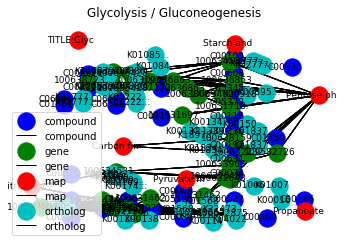

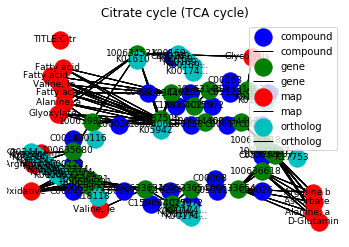


 gla


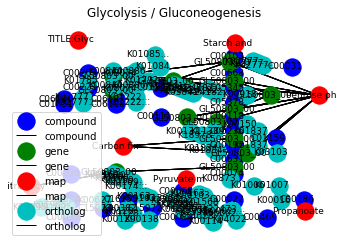

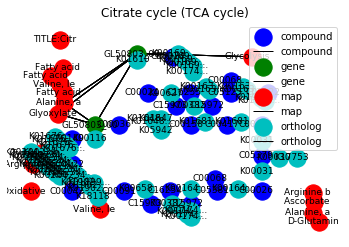


 vcn


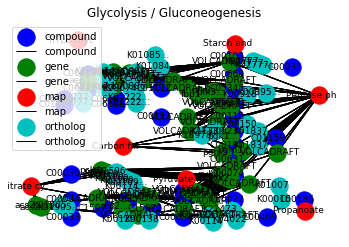

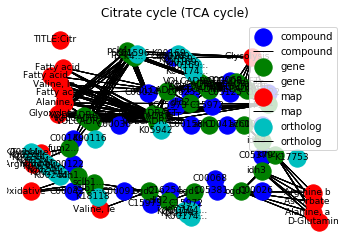


 hav


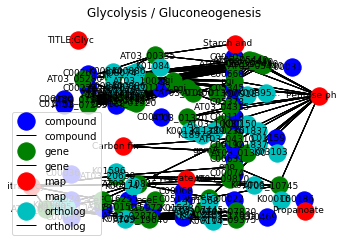

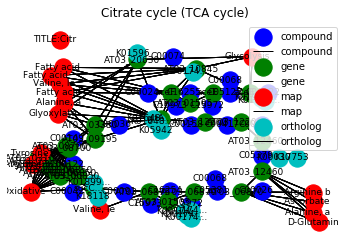


 rtp


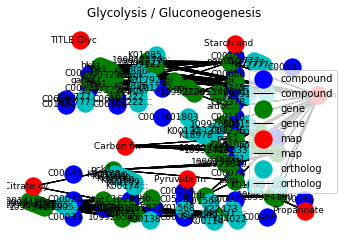

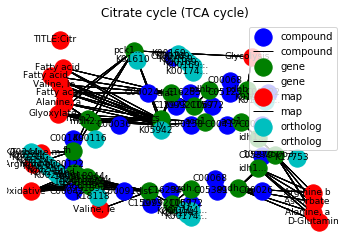

In [6]:
print(" aqu")
aqu_glyco = kg.KEGGpathway(pathway_id = "aqu00010")
aqu_glyco.draw()
aqu_tca = kg.KEGGpathway(pathway_id = "aqu00020")
aqu_tca.draw()

print("\n gla")
gla_glyco = kg.KEGGpathway(pathway_id = "gla00010")
gla_glyco.draw()
gla_tca = kg.KEGGpathway(pathway_id = "gla00020")
gla_tca.draw()

print("\n vcn")
vcn_glyco = kg.KEGGpathway(pathway_id = "vcn00010")
vcn_glyco.draw()
vcn_tca = kg.KEGGpathway(pathway_id = "vcn00020")
vcn_tca.draw()

print("\n hav")
hav_glyco = kg.KEGGpathway(pathway_id = "hav00010")
hav_glyco.draw()
hav_tca = kg.KEGGpathway(pathway_id = "hav00020")
hav_tca.draw()

print("\n rtp")
rtp_glyco = kg.KEGGpathway(pathway_id = "rtp00010")
rtp_glyco.draw()
rtp_tca = kg.KEGGpathway(pathway_id = "rtp00020")
rtp_tca.draw()

In [7]:
# get distinct edges

aqu_edges = list(dict.fromkeys(aqu_glyco.edges))
aqu_edges.extend(list(dict.fromkeys(aqu_tca.edges)))
aqu_edges = list(dict.fromkeys(aqu_edges))

gla_edges = list(dict.fromkeys(gla_glyco.edges))
gla_edges.extend(list(dict.fromkeys(gla_tca.edges)))
gla_edges = list(dict.fromkeys(gla_edges))

vcn_edges = list(dict.fromkeys(vcn_glyco.edges))
vcn_edges.extend(list(dict.fromkeys(vcn_tca.edges)))
vcn_edges = list(dict.fromkeys(vcn_edges))

hav_edges = list(dict.fromkeys(hav_glyco.edges))
hav_edges.extend(list(dict.fromkeys(hav_tca.edges)))
hav_edges = list(dict.fromkeys(hav_edges))

rtp_edges = list(dict.fromkeys(rtp_glyco.edges))
rtp_edges.extend(list(dict.fromkeys(rtp_tca.edges)))
rtp_edges = list(dict.fromkeys(rtp_edges))

all_edges = []
all_edges.extend(aqu_edges)
all_edges.extend(gla_edges)
all_edges.extend(vcn_edges)
all_edges.extend(hav_edges)
all_edges.extend(rtp_edges)

In [8]:
# to create frequency table

ft = {}        
        
for edge in all_edges:
    bit = ""
    bit = setBit(bit,aqu_edges,edge)
    bit = setBit(bit,gla_edges,edge)
    bit = setBit(bit,vcn_edges,edge)
    bit = setBit(bit,hav_edges,edge)
    bit = setBit(bit,rtp_edges,edge)
    
    ft[edge] = bit

print("Frequency Table (Glycolysis) \n")
for key, value in ft.items():
    print(key, ' : ', value)

Frequency Table (Glycolysis) 

('18', '64')  :  10111
('18', '63')  :  10111
('18', '62')  :  11110
('18', '46')  :  11111
('42', '50')  :  10111
('42', '49')  :  10111
('42', '140')  :  10111
('42_1', '50')  :  10001
('42_1', '49')  :  10001
('42_1', '140')  :  10001
('42_2', '50')  :  10001
('42_2', '49')  :  10001
('42_2', '140')  :  10001
('42_3', '50')  :  10001
('42_3', '49')  :  10001
('42_3', '140')  :  10001
('42_4', '50')  :  10001
('42_4', '49')  :  10001
('42_4', '140')  :  10001
('42_5', '50')  :  10000
('42_5', '49')  :  10000
('42_5', '140')  :  10000
('42_6', '50')  :  10000
('42_6', '49')  :  10000
('42_6', '140')  :  10000
('46', '67')  :  11111
('46', '66')  :  11111
('46', '75')  :  10101
('46', '71')  :  11111
('46', '72')  :  10110
('46', '59')  :  11111
('46', '52')  :  10111
('46', '57')  :  10111
('46', '57_1')  :  10100
('46', '62')  :  11110
('46', '143')  :  10001
('46', '147')  :  11110
('46', '150')  :  10101
('47', '67')  :  11111
('52', '57')  :  10111
(

In [9]:
# to create nodes of freq. table 
    
ft_nodes = defaultdict(list)
for key, value in sorted(ft.items()):
    ft_nodes[value].append(key)
for key, value in ft_nodes.items():
    print(key, ' : ', value,"\n")

10111  :  [('107', '111'), ('107', '122'), ('18', '63'), ('18', '64'), ('33', '35'), ('33', '36'), ('34', '113'), ('34', '39'), ('34', '54'), ('34', '55'), ('34', '60'), ('35', '36'), ('36', '37'), ('36', '58'), ('37', '107'), ('37', '122'), ('37', '58'), ('39', '113'), ('39', '54'), ('39', '55'), ('39', '60'), ('41', '44'), ('42', '140'), ('42', '49'), ('42', '50'), ('43', '107'), ('43', '111'), ('43', '47'), ('43', '57'), ('45', '46'), ('46', '47'), ('46', '49'), ('46', '51'), ('46', '52'), ('46', '53'), ('46', '57'), ('46', '91'), ('46', '94'), ('50', '84'), ('51', '91'), ('52', '57'), ('52', '91'), ('53', '54'), ('53', '79'), ('53', '91'), ('54', '140'), ('54', '58'), ('54', '79'), ('57', '107'), ('57', '59'), ('58', '140'), ('63', '66'), ('63', '68'), ('64', '66'), ('64', '68'), ('84', '86'), ('86', '89'), ('86', '91'), ('89', '91'), ('91', '94')] 

10011  :  [('107_1', '111'), ('107_1', '122'), ('37', '107_1'), ('43', '107_1'), ('57', '107_1')] 

10010  :  [('107_2', '111'), ('10

In [10]:
# to create clusters of glycolysus freq. table 

ft_cluster = defaultdict(list)

for key in ft_nodes.keys():
    count = str(key).count("1")
    ft_cluster[count].append(key)

for key, value in sorted(ft_cluster.items()):
    print(key, ' : ', value,"\n")

1  :  ['00010', '00100', '00001', '01000', '10000'] 

2  :  ['10010', '10100', '10001', '00101', '00110', '00011'] 

3  :  ['10011', '10101', '00111', '10110', '01011', '11001', '01110'] 

4  :  ['10111', '11110', '01111'] 

5  :  ['11111'] 



In [11]:
all_dict = defaultdict(list)
all_dict[0] = aqu_edges
all_dict[1] = gla_edges
all_dict[2] = vcn_edges
all_dict[3] = hav_edges
all_dict[4] = rtp_edges

# to create jaccard similarity index for glycolysis
jsi = [[0 for c in range(5)] for r in range(5)]

for x in range(0,5):
    for y in range(0,5):
        i = getIntersection(all_dict[x],all_dict[y])
        u = getUnion(all_dict[x],all_dict[y],i)
        
        if i/u == 1:
            jsi[x][y] = 0
        else:
            jsi[x][y] = i/u

for x in jsi:
    print(x)

[0, 0.17289719626168223, 0.32425742574257427, 0.27202072538860106, 0.5015673981191222]
[0.17289719626168223, 0, 0.10028653295128939, 0.13712374581939799, 0.1388888888888889]
[0.32425742574257427, 0.10028653295128939, 0, 0.2235294117647059, 0.27234927234927236]
[0.27202072538860106, 0.13712374581939799, 0.2235294117647059, 0, 0.2267818574514039]
[0.5015673981191222, 0.1388888888888889, 0.27234927234927236, 0.2267818574514039, 0]


In [12]:
df = pd.DataFrame.from_dict(jsi,orient='columns')
df.columns=['aqu', 'gla', 'vcn', 'hav', 'rtp']
df.index=['aqu', 'gla', 'vcn', 'hav', 'rtp']
df[:] = np.tril(df.values, k=-1)
print(df)

          aqu       gla       vcn       hav  rtp
aqu  0.000000  0.000000  0.000000  0.000000  0.0
gla  0.172897  0.000000  0.000000  0.000000  0.0
vcn  0.324257  0.100287  0.000000  0.000000  0.0
hav  0.272021  0.137124  0.223529  0.000000  0.0
rtp  0.501567  0.138889  0.272349  0.226782  0.0


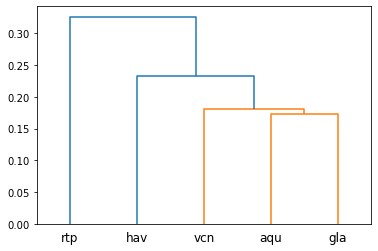

In [13]:
Z = hierarchy.linkage(df, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z, labels =['aqu', 'gla', 'vcn', 'hav', 'rtp'])